<a href="https://colab.research.google.com/github/Location-Artistry/ColabNotebooks/blob/master/GeoPandas_Viz_JSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook for Visualizing Data with GeoPandas


In [ ]:
%%time 
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
!pip install pygeos

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import os
from IPython.display import display
from pandas.io.json import json_normalize
import requests

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:87: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


#Start Working Section

##9-8-2020
Working successfully to bring in miCounties GeoJSON as gdf and parse NHBPpa   
data from json - > dataFrame -> add geomtery from lat.long->create gdf


In [3]:
def GeoJSONtoGDF(jsonURL):
  geoDF = gpd.read_file(jsonURL)
  display(geoDF.head())
  return geoDF

In [13]:
purpleAirMi = 'https://purpleairwidget.firebaseapp.com/purpleAirData/44439,2822,5712,43297,7772,37659,11630,37741,17275,43799,47793,5588,54961,18513'
#PAallSta = 'https://www.purpleair.com/json'
michCounties = 'https://opendata.arcgis.com/datasets/67a8ff23b5f54f15b7133b8c30981441_0.geojson'

paMiGDF = GeoJSONtoGDF(purpleAirLocal)
miGDF = GeoJSONtoGDF(michCounties)

,ID,label,flagged_high,version,WiFiSignal,PM2_5Value,sensorDiff,AQI,AQIText,AQI1Hour,AQI1HourText,AQI24Hour,AQI24HourText,AQI1Week,AQI1WeekText,geometry
0,44439,NHBP,0.0,6.01,-58,14.86,1.31,57,Moderate,64.0,Moderate,57.0,Moderate,45.0,Good,POINT (-85.26918 42.10240)
1,2822,Milton Township,NaN,6.01,-69,3.09,2.01,13,Good,NaN,Good,36.0,Good,30.0,Good,POINT (-86.17218 41.76787)
2,5712,Harlan,NaN,6.01,-49,10.03,1.34,42,Good,36.0,Good,56.0,Moderate,54.0,Moderate,POINT (-84.93002 41.19428)
3,43297,SFront,NaN,6.01,-61,2.45,0.38,10,Good,14.0,Good,46.0,Good,53.0,Moderate,POINT (-85.81386 42.88592)
4,7772,Emu2,NaN,6.01,-64,8.4,0.28,35,Good,15.0,Good,51.0,Moderate,NaN,Good,POINT (-83.76240 42.25261)


,OBJECTID,FIPSCODE,FIPSNUM,NAME,LABEL,TYPE,CNTY_CODE,SQKM,SQMILES,ACRES,VER,LAYOUT,PENINSULA,ShapeSTArea,ShapeSTLength,geometry
0,1,001,1,Alcona,Alcona County,County,001,1798.557,694.424,444428.381,17A,landscape,lower,3.559229e+09,242638.353149,"POLYGON ((-83.88712 44.55385, -83.88711 44.552..."
1,2,003,3,Alger,Alger County,County,003,2424.879,936.247,599194.252,17A,landscape,upper,5.102846e+09,567351.604980,"MULTIPOLYGON (((-87.11602 46.27726, -87.11600 ..."
2,3,005,5,Allegan,Allegan County,County,005,2180.969,842.073,538923.422,17A,landscape,lower,4.028376e+09,261622.047738,"POLYGON ((-85.54343 42.42905, -85.54343 42.430..."
3,4,007,7,Alpena,Alpena County,County,007,1539.373,594.352,380383.246,17A,landscape,lower,3.082999e+09,408567.836222,"MULTIPOLYGON (((-83.34340 44.88554, -83.34361 ..."
4,5,009,9,Antrim,Antrim County,County,009,1358.721,524.603,335743.663,17A,landscape,lower,2.719403e+09,255626.802481,"MULTIPOLYGON (((-84.84877 44.93222, -84.84878 ..."


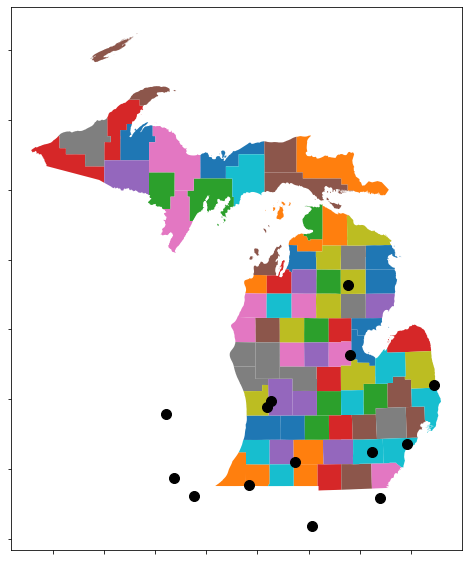

In [14]:
# Plot Michigan county basemap and air quality station locations
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels([])
ax.set_yticklabels([])
miGDF.plot(ax=ax, column='NAME');
paMiGDF.plot(ax=ax, markersize=100, color='black');

In [ ]:
# dont even need this section!
# may include as additional example
import json 
response = requests.get(NHBPpa)
rText = response.text
data = json.loads(rText)
df = pd.json_normalize(data['features'])
df['geometry'] = df['geometry.coordinates']
df
df['latitude'] = df.apply(lambda row: row.geometry[1], axis=1)
df['longitude'] = df.apply(lambda row: row.geometry[0], axis=1)
df.head().T
#gdf = gpd.read_file(df)
#dfEX['SITE #'] = dfEX.apply(lambda row: siteList[row.SITE_ID], axis=1)

In [ ]:
for lat, lon in zip((df['latitude'])[:5], df['longitude'][:5]):
    geometry = lat, lon
    geomPts = []
    geomPts.append(geometry)
    print(geometry)

In [ ]:
# Save the geometry as a new feature
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geometry[:5]
# Create crs dictionary
crs = 'epsg:4326'
gdf3 = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
gdf3.head()

In [ ]:
# Overlay points and Polygons
fig, ax = plt.subplots(figsize=(10,10))
gdf2.plot(ax=ax, column='NAME');
#ax.margins(-.2, -.2)
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf3.plot(ax=ax, markersize=100, color='black');

Next step working to process entire Purple Air json as df->gdf!

In [15]:
purpleAirAll = 'https://www.purpleair.com/json'

In [16]:
# Read in all of the 23,000 Purple Air Sensors into a dataFrame
# Normalize the array of objects to separate records
%%time
df = pd.read_json(purpleAirAll)
allStaDF = pd.json_normalize(df['results'])

CPU times: user 848 ms, sys: 53.6 ms, total: 902 ms
Wall time: 4.4 s


In [17]:
allStaDF.head().T

,0,1,2,3,4
ID,14633,14634,25999,26000,14091
Label,Hazelwood canary,Hazelwood canary B,Villages of Bridgestone AQI,Villages of Bridgestone AQI B,WC Hillside
DEVICE_LOCATIONTYPE,outside,NaN,outside,NaN,outside
THINGSPEAK_PRIMARY_ID,559921,559923,694803,694805,553460
THINGSPEAK_PRIMARY_ID_READ_KEY,CU4BQZZ38WO5UJ4C,DULWDNCI9M6PCIPC,OO5PFS7JTQQSHQHE,OAPUW1RM0X9CJDYO,1ZIXYGGG1W61J6OI
THINGSPEAK_SECONDARY_ID,559922,559924,694804,694806,553463
THINGSPEAK_SECONDARY_ID_READ_KEY,D0YNZ1LM59LL49VQ,EY2CNMYRUZHDW1AL,LW93B1YLLZ4N4QFM,XAFZ75MBJ90SZIU7,NYFHXX29D0MHNI9F
Lat,37.2756,37.2756,30.0538,30.0538,37.8836
Lon,-121.964,-121.964,-95.4946,-95.4946,-122.07
PM2_5Value,17.64,16.88,1.6,1.21,20.8


In [27]:
allStaDF.count()

ID                                  23747
Label                               23747
DEVICE_LOCATIONTYPE                 11778
THINGSPEAK_PRIMARY_ID               23747
THINGSPEAK_PRIMARY_ID_READ_KEY      23747
THINGSPEAK_SECONDARY_ID             23747
THINGSPEAK_SECONDARY_ID_READ_KEY    23747
Lat                                 23575
Lon                                 23575
PM2_5Value                          21735
LastSeen                            23747
Type                                11900
Hidden                              23747
isOwner                             23747
humidity                            11630
temp_f                              11630
pressure                            11630
AGE                                 23747
Stats                               21735
ParentID                            11873
Flag                                 2092
A_H                                   185
Ozone1                                  6
dtype: int64

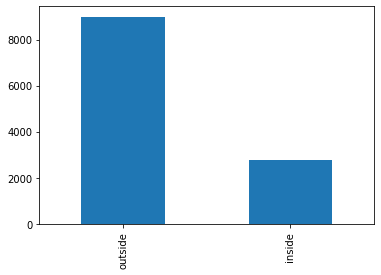

In [19]:
pd.value_counts(allStaDF['DEVICE_LOCATIONTYPE']).plot.bar()

In [28]:
for lat, lon in zip((allStaDF['Lat'])[:5], allStaDF['Lon'][:5]):
    geometry = lon, lat
    geomPts = []
    geomPts.append(geometry)
    print(geometry)

(-121.964134, 37.275561)
(-121.964134, 37.275561)
(-95.494643, 30.053808)
(-95.494643, 30.053808)
(-122.070087, 37.88362)


In [31]:
# Create geometry as a new feature
geometry = [Point(xy) for xy in zip(allStaDF['Lon'], allStaDF['Lat'])]
# Create crs dictionary
crs = 'epsg:4326'
allStaGDF = gpd.GeoDataFrame(allStaDF, crs=crs, geometry=geometry)
allStaDF.head().T

,0,1,2,3,4
ID,14633,14634,25999,26000,14091
Label,Hazelwood canary,Hazelwood canary B,Villages of Bridgestone AQI,Villages of Bridgestone AQI B,WC Hillside
DEVICE_LOCATIONTYPE,outside,NaN,outside,NaN,outside
THINGSPEAK_PRIMARY_ID,559921,559923,694803,694805,553460
THINGSPEAK_PRIMARY_ID_READ_KEY,CU4BQZZ38WO5UJ4C,DULWDNCI9M6PCIPC,OO5PFS7JTQQSHQHE,OAPUW1RM0X9CJDYO,1ZIXYGGG1W61J6OI
THINGSPEAK_SECONDARY_ID,559922,559924,694804,694806,553463
THINGSPEAK_SECONDARY_ID_READ_KEY,D0YNZ1LM59LL49VQ,EY2CNMYRUZHDW1AL,LW93B1YLLZ4N4QFM,XAFZ75MBJ90SZIU7,NYFHXX29D0MHNI9F
Lat,37.2756,37.2756,30.0538,30.0538,37.8836
Lon,-121.964,-121.964,-95.4946,-95.4946,-122.07
PM2_5Value,17.64,16.88,1.6,1.21,20.8


IndexError: ignored

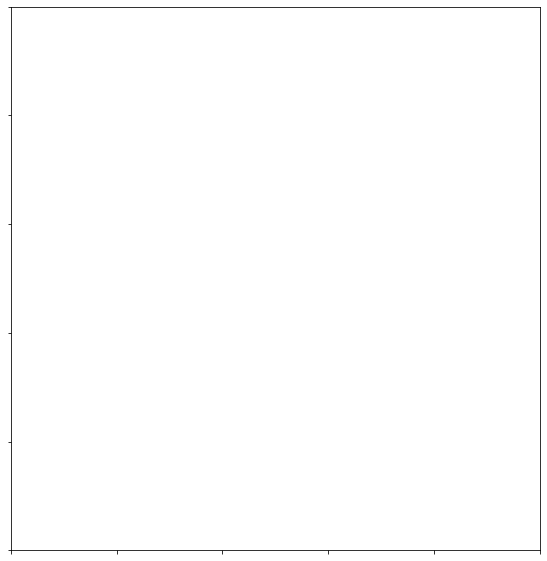

In [37]:
# Plot all purple air stations
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels([])
ax.set_yticklabels([])
allStaGDF.plot(ax=ax, markersize=3, color='black');

In [34]:
# Check for missing coordinate values
allStaGDF.isnull().sum()

ID                                      0
Label                                   0
DEVICE_LOCATIONTYPE                 11969
THINGSPEAK_PRIMARY_ID                   0
THINGSPEAK_PRIMARY_ID_READ_KEY          0
THINGSPEAK_SECONDARY_ID                 0
THINGSPEAK_SECONDARY_ID_READ_KEY        0
Lat                                   172
Lon                                   172
PM2_5Value                           2012
LastSeen                                0
Type                                11847
Hidden                                  0
isOwner                                 0
humidity                            12117
temp_f                              12117
pressure                            12117
AGE                                     0
Stats                                2012
ParentID                            11874
Flag                                21655
A_H                                 23562
Ozone1                              23741
geometry                          

In [35]:
finalGDF = allStaGDF.dropna(subset=['Lat','Lon'])
finalGDF.isnull().sum()

ID                                      0
Label                                   0
DEVICE_LOCATIONTYPE                 11867
THINGSPEAK_PRIMARY_ID                   0
THINGSPEAK_PRIMARY_ID_READ_KEY          0
THINGSPEAK_SECONDARY_ID                 0
THINGSPEAK_SECONDARY_ID_READ_KEY        0
Lat                                     0
Lon                                     0
PM2_5Value                           1997
LastSeen                                0
Type                                11745
Hidden                                  0
isOwner                                 0
humidity                            12013
temp_f                              12013
pressure                            12013
AGE                                     0
Stats                                1997
ParentID                            11804
Flag                                21494
A_H                                 23390
Ozone1                              23569
geometry                          

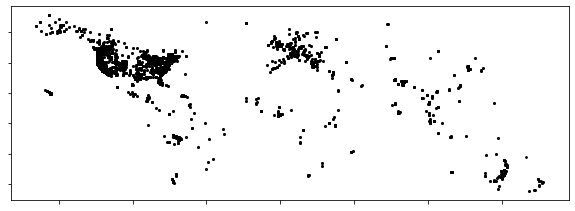

In [38]:
# Re-plot air quality stations after dropping missing location values
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels([])
ax.set_yticklabels([])
finalGDF.plot(ax=ax, markersize=3, color='black');

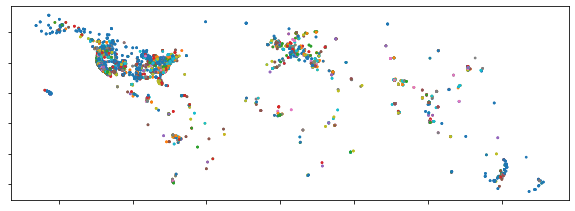

In [39]:
# Re-plot air quality stations after dropping missing location values
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticklabels([])
ax.set_yticklabels([])
finalGDF.plot(ax=ax, markersize=3, column='PM2_5Value');

In [40]:
m = folium.Map()
m

In [44]:
# Create sample of 23,000 plus station locations
airSample = finalGDF.sample(500)
# create new folium map instance
m = folium.Map()
folium.GeoJson(airSample).add_to(m)
# folium map display magic
m

In [49]:
# FastMarkerCluster plugin
from folium.plugins import FastMarkerCluster
# extract Lat and Lon from station records
lons = finalGDF['Lon']
lats = finalGDF['Lat']
# create new folium map centered on mean of station coodinates
m = folium.Map(
    location = [np.mean(finalGDF.Lat), np.mean(finalGDF.Lon)],
    tiles = 'CartoDB dark_matter',
    zoom_start=5
    )

FastMarkerCluster(data=list(zip(lats, lons))).add_to(m)
folium.LayerControl().add_to(m)
m